In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv') #the whole population
coffee_red = coffee_full.sample(200) #reduced data, in order to simulate the sample someone would gather for the population

In [2]:
coffee_red.shape

(200, 4)

In [3]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [4]:
mask = coffee_red["drinks_coffee"] == True

coffee_red[mask].shape 

(119, 4)

The number of coffee drinkers is 119, while the number of non coffee drinkers is 81

In [5]:
prop_cof = coffee_red[mask].shape[0]/coffee_red.shape[0]

prop_cof #proportion of coffee drinkers in the sample

0.595

In [6]:
mask2 = coffee_full["drinks_coffee"] == True

tot_prop_cof = coffee_full[mask2].shape[0]/coffee_full.shape[0]

tot_prop_cof #proportion of coffee drinkers in the original population

0.589778076664425

In [7]:
mask = coffee_red["drinks_coffee"] == True

coffee_red.loc[mask,"height"].mean() #average height of coffee drinkers

68.11962990858618

In [8]:
coffee_red.loc[~mask,"height"].mean() #average height of NON coffee drinkers

66.78492279927877

We are going to apply bootstraping in our sample in order to find the interval of the population parameter (proportion)

In [9]:
bootstrap = coffee_red.sample(n=200,replace=True,random_state=42)

bootstrap.head()

,user_id,age,drinks_coffee,height
705,4350,<21,False,68.812356
1868,5837,>=21,True,71.655969
809,2779,>=21,True,68.579454
93,2423,>=21,True,69.540052
1872,3510,<21,True,62.854094


In [10]:
bootstrap.shape

(200, 4)

In [11]:
mask = bootstrap["drinks_coffee"]==True

bootstrap[mask].shape[0]/bootstrap.shape[0] #proportion of coffee drinkers in bootstrap sample

0.595

In [12]:
#We will take 10000 samples using bootstraping in order to find the average height of coffee drinkers

#bootstrapping

samples_coffee_drinkers = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask = bootstrap["drinks_coffee"]==True

    samples_coffee_drinkers.append(bootstrap.loc[mask,"height"].mean()) #mean height of each sample
    

In [13]:
#We will take 10000 samples using bootstraping in order to find the average height of non coffee drinkers

#bootstrapping

samples_non_coffee_drinkers = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask = bootstrap["drinks_coffee"]==False

    samples_non_coffee_drinkers.append(bootstrap.loc[mask,"height"].mean()) #mean height of each sample

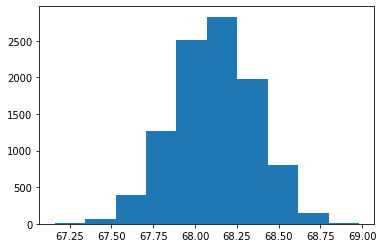

In [14]:
import matplotlib.pyplot as plt

plt.hist(samples_coffee_drinkers);

In [15]:
cof_np = np.asarray(samples_coffee_drinkers) #distribution of sampled mean heights
cof_np.mean()

68.11685919065505

The mean height of coffee drinkers of the original sample(coffee_red) is the same (almost) 
as the combined mean of all sampled height means 

In [16]:
mask = coffee_full["drinks_coffee"]==True

coffee_full.loc[mask,"height"].mean()

68.40021025548401

The mean of sampled mean heights is also really close to the mean height of the original population(coffee_full)

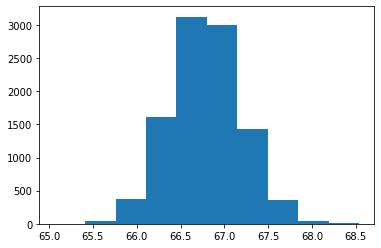

In [18]:
plt.hist(samples_non_coffee_drinkers); #distribution of sampled mean heights

In [19]:
non_cof_np = np.asarray(samples_non_coffee_drinkers)
non_cof_np.mean()

66.78942873687961

The mean height of non coffee drinkers of the original sample(coffee_red) is the same (almost) 
as the combined mean of all sampled height means 

In [20]:
mask = coffee_full["drinks_coffee"]==False

coffee_full.loc[mask,"height"].mean()

66.44340776214705

The mean of sampled mean heights is also really close to the mean height of the original population(coffee_full)

# IF WE PROVIDE AN INTERVAL FOR THE MEAN HEIGHT THAT WAS CALCULATED USING BOOTSTRAPING,

# ITS APPROXIMATION OF THE MEAN HEIGHT OF THE ORIGINAL POPULATION WILL BE MORE ACCURATE

In [21]:
#condidence interval for the mean height of the smokers 

#they give us the location of the percentile we asked
(np.percentile(cof_np,2.5),np.percentile(cof_np,97.5)) #95% confidence interval

(67.640487640439, 68.57673511896196)

There is a 95% posibility that the population mean height will be between these 2 values 

The population mean height for smokers is 68.40021025548401 which is within the confidence interval

In [22]:
#condidence interval for the mean height of the non smokers 

#they give us the location of the percentile we asked
(np.percentile(non_cof_np,2.5),np.percentile(non_cof_np,97.5)) #95% confidence interval

(66.00553304554545, 67.5973045839486)

There is a 95% posibility that the population mean height will be between these 2 values 

The population mean height for non smokers is 66.44340776214705 which is within the confidence interval

## THROUGH THE SAMPLING DISTRIBUTION WE CAN CALCULATE AN INTERVAL, IN WHICH OUR POPULATION PARAMETER IS GOING TO BE INSIDE

### The same methods can also be applied for difference in means

In [23]:
#difference between the mean height of smokers and non smokers

In [24]:
#bootstrapping

samples_mean_height_dif = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask = bootstrap["drinks_coffee"]==True
    
    dif = bootstrap.loc[mask,"height"].mean() - bootstrap.loc[~mask,"height"].mean() #smoker avg height - non smoker avg 

    samples_mean_height_dif.append(dif) 





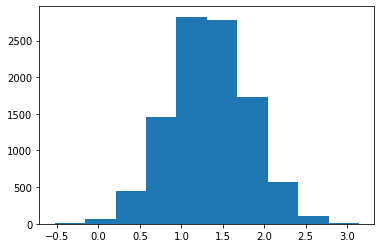

In [25]:
plt.hist(samples_mean_height_dif); #distribution of sampled mean height difference

In [26]:
#99% condidence interval for the mean difference of the height

#they give us the location of the percentile we asked
(np.percentile(samples_mean_height_dif,0.5),np.percentile(samples_mean_height_dif,99.5)) #99% confidence interval

(0.1358991520647377, 2.563453685977798)

There is a 0.99 prob that the difference between the mean height of smokers and mean height of non smokers will be between the range (0.1358991520647377, 2.563453685977798)

In [27]:
#As it can be seen, the average height of a smoker is bigger than the average height of a non smoker

In [ ]:
#difference in height between people over 21 and bellow 21

In [29]:
coffee_red["age"].unique()

array(['<21', '>=21'], dtype=object)

In [30]:
#bootstrapping

samples_mean_height_dif = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask = bootstrap["age"]== ">=21"
    
    dif = bootstrap.loc[mask,"height"].mean() - bootstrap.loc[~mask,"height"].mean() #above 21 avg height - bellow 21 avg 

    samples_mean_height_dif.append(dif) 


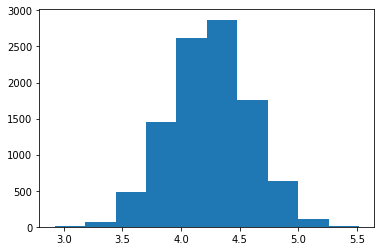

In [31]:
plt.hist(samples_mean_height_dif); #distribution of sampled mean height difference

In [32]:
#99% condidence interval for the mean difference of the height

#they give us the location of the percentile we asked
(np.percentile(samples_mean_height_dif,0.5),np.percentile(samples_mean_height_dif,99.5)) #99% confidence interval

(3.384624971838698, 5.105178892537329)

There is a 0.99 prob that the difference between the mean heights of people over 21 and bellow (over21-bellow21) will be in that interval

Furthermore, it safe to assume that people over 21 are taller than people bellow 21 on average

In [ ]:
#For people over 21, compare the mean height difference of smokers and non smokers

In [38]:
#bootstrapping

samples_mean_height_dif = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask1 = bootstrap["age"] == ">=21"
    mask2 = bootstrap["drinks_coffee"] == True
    mask = mask1&mask2 #coffee drinkers
    maskn = mask1&(~mask2)
    
    dif = bootstrap.loc[maskn,"height"].mean() - bootstrap.loc[mask,"height"].mean() 
    #avg height of non smokers above 21 - avg height of smokers above 21

    samples_mean_height_dif.append(dif) 


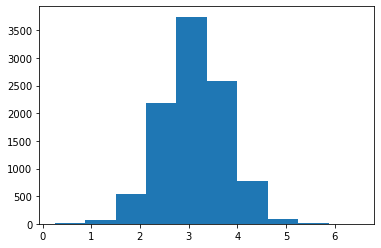

In [39]:
plt.hist(samples_mean_height_dif); #distribution of sampled mean height difference

In [40]:
#condidence interval 

#they give us the location of the percentile we asked
(np.percentile(samples_mean_height_dif,2.5),np.percentile(samples_mean_height_dif,97.5)) #95% confidence interval

(1.8112701857664477, 4.380581425738178)

In [ ]:
#It is safe to assume that for people over 21 the non smokers are on average taller than smokers

In [41]:
#bootstrapping

samples_mean_height_dif = []
for _ in range(10000):
    
    bootstrap = coffee_red.sample(n=200,replace=True)
    mask1 = bootstrap["age"] == "<21"
    mask2 = bootstrap["drinks_coffee"] == True
    mask = mask1&mask2 #coffee drinkers
    maskn = mask1&(~mask2)
    
    dif = bootstrap.loc[maskn,"height"].mean() - bootstrap.loc[mask,"height"].mean() 
    #avg height of non smokers above 21 - avg height of smokers above 21

    samples_mean_height_dif.append(dif) 

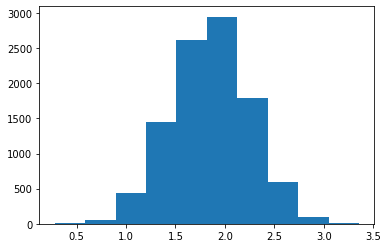

In [42]:
plt.hist(samples_mean_height_dif); #distribution of sampled mean height difference

In [43]:
#condidence interval 

#they give us the location of the percentile we asked
(np.percentile(samples_mean_height_dif,2.5),np.percentile(samples_mean_height_dif,97.5)) #95% confidence interval

(1.08866520346426, 2.6207554352667426)

In [44]:
#It is safe to assume that for people over 21 the non smokers are on average taller than smokers

# Simpson's Paradox

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

In [47]:
coffee_red["age"].value_counts()

>=21    106
<21      94
Name: age, dtype: int64

In [48]:
coffee_red["drinks_coffee"].value_counts()

True     119
False     81
Name: drinks_coffee, dtype: int64